In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the Required Libraries

In [2]:
# import all the necessary libraries here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score, recall_score


Importing the data into a pandas dataframe

In [3]:
df = pd.read_excel('/content/drive/MyDrive/asssign1/dataset/logistic-regression/Pumpkin_Seeds_Dataset.xlsx')
print(df.shape)

(2500, 13)


Viewing the First 10 samples of the data

In [4]:
df.head(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
5,73191,1041.460,405.8132,231.4261,73969,305.2698,0.8215,0.9895,0.7165,0.8480,1.7535,0.7522,Çerçevelik
6,73338,1020.055,392.2516,238.5494,73859,305.5762,0.7938,0.9929,0.7187,0.8857,1.6443,0.7790,Çerçevelik
7,69692,1049.108,421.4875,211.7707,70442,297.8836,0.8646,0.9894,0.6736,0.7957,1.9903,0.7067,Çerçevelik
8,95727,1231.609,488.1199,251.3086,96831,349.1180,0.8573,0.9886,0.6188,0.7930,1.9423,0.7152,Çerçevelik
9,73465,1047.767,413.6504,227.2644,74089,305.8407,0.8356,0.9916,0.7443,0.8409,1.8201,0.7394,Çerçevelik


Splitting the data frame into Features and output targets in numpy array format

In [5]:
x_train=np.array(df.iloc[:,:12])
y_train=np.array(df.iloc[:,12])

Shape of input features:

*   Total number of samples :2500
*   Total number of Features : 12

In [6]:
x_train.shape

(2500, 12)

In [7]:
x_train

array([[5.627600e+04, 8.882420e+02, 3.261485e+02, ..., 8.963000e-01,
        1.480900e+00, 8.207000e-01],
       [7.663100e+04, 1.068146e+03, 4.171932e+02, ..., 8.440000e-01,
        1.781100e+00, 7.487000e-01],
       [7.162300e+04, 1.082987e+03, 4.358328e+02, ..., 7.674000e-01,
        2.065100e+00, 6.929000e-01],
       ...,
       [8.799400e+04, 1.210314e+03, 5.072200e+02, ..., 7.549000e-01,
        2.282800e+00, 6.599000e-01],
       [8.001100e+04, 1.182947e+03, 5.019065e+02, ..., 7.185000e-01,
        2.451300e+00, 6.359000e-01],
       [8.493400e+04, 1.159933e+03, 4.628951e+02, ..., 7.933000e-01,
        1.973500e+00, 7.104000e-01]])

Shape of output target:

*  total number of samples :2500

In [7]:
y_train.shape

(2500,)

In [8]:
y_train

array(['Çerçevelik', 'Çerçevelik', 'Çerçevelik', ..., 'Ürgüp Sivrisi',
       'Ürgüp Sivrisi', 'Ürgüp Sivrisi'], dtype=object)

function for normalising the input data

In [9]:
def normalise(x):
  mean = np.mean(x,axis=0)
  sigma = np.std(x,axis=0)
  x = (x-mean)/sigma
  return x

normalising the data

In [10]:
x_train = normalise(x_train)
x_train

array([[-1.78470346, -2.21575484, -2.32022415, ...,  1.8737626 ,
        -1.77506344,  2.19727996],
       [-0.29478016, -0.56880361, -0.70091635, ...,  0.93837685,
        -0.82486401,  0.84023019],
       [-0.66135033, -0.43294002, -0.36939513, ..., -0.43161453,
         0.07405883, -0.21148339],
       ...,
       [ 0.53695644,  0.7326892 ,  0.90028724, ..., -0.65517709,
         0.76312751, -0.83346454],
       [-0.04737457,  0.48215494,  0.8057821 , ..., -1.30619127,
         1.29646729, -1.28581446],
       [ 0.31297387,  0.27147071,  0.11193101, ...,  0.0316071 ,
        -0.21587543,  0.1183551 ]])

encoding the output labels

In [11]:
y_train = np.array([1 if label == 'Çerçevelik' else 0 for label in y_train])
y_train

array([1, 1, 1, ..., 0, 0, 0])

Splitting the data into training ,validation and test datasets

In [12]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(x_train, y_train, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.375)

In [13]:
a=X_train.shape
b=X_val.shape
c=X_test.shape
print("The size of train data is ",a)
print("The size of validation data is ",b)
print("The size of test data is ",c)

The size of train data is  (1250, 12)
The size of validation data is  (750, 12)
The size of test data is  (500, 12)


In [14]:

y_train = y_train.reshape(-1,1)
y_val = y_val.reshape(-1,1)
y_test = y_test.reshape(-1,1)
a=y_train.shape
b=y_val.shape
c=y_test.shape
print("The size of train data is ",a)
print("The size of validation data is ",b)
print("The size of test data is ",c)


The size of train data is  (1250, 1)
The size of validation data is  (750, 1)
The size of test data is  (500, 1)


Sigmoid Function

In [15]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

Logistic Loss Function:




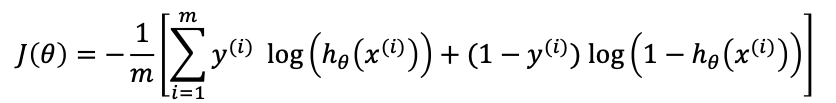

In [16]:
def cost_logistic(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)

        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)

    cost = cost / m
    return cost

Gradient Descent:




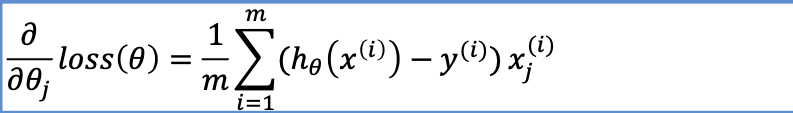



In [17]:
def gradient_logistic(X, y, w, b):
    m,n = X.shape
    dj_dw = np.zeros((n,1))
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)
        err_i  = f_wb_i  - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_db, dj_dw

Implementation of Gradient Descent

In [23]:
def gradient_descent(x,y,x_val,y_val,w_in,b_in,alpha,num):

    losses_train = []
    losses_valid =[]
    w = w_in
    b = b_in

    for i in range(num):
        dj_db, dj_dw = gradient_logistic(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        loss = cost_logistic(x,y,w,b)
        losses_train.append(loss)
        y_pred_1 = np.dot(x_val,w) + b
        y_pred = np.where(y_pred_1>0.5,1,0)
        precision = precision_score(y_val,y_pred,zero_division=1)
        recall = recall_score(y_val,y_pred)
        accuracy = accuracy_score(y_val,y_pred)
        loss = cost_logistic(x_val,y_val,w,b)
        losses_valid.append(loss)
        if i%10==0:
           print("epoch:",i,"validation loss : ",loss ,"validation accuracy:",accuracy,"validation precision:",precision,"validation recall:",recall)

    return w, b, losses_train,losses_valid

Initilaising the weights and bias and applying  gradient descent to optimize the Logistic Loss

In [24]:
initial_w = np.zeros((12,1))
initial_b = 0

num=1000
alpha = 0.01
w_final,b_final,loss_train,loss_valid = gradient_descent(X_train,y_train,X_val,y_val,initial_w,initial_b,alpha,num)

epoch: 0 validation loss :  [0.68621253] validation accuracy: 0.5066666666666667 validation precision: 1.0 validation recall: 0.0
epoch: 10 validation loss :  [0.62650353] validation accuracy: 0.508 validation precision: 1.0 validation recall: 0.002702702702702703
epoch: 20 validation loss :  [0.58096777] validation accuracy: 0.576 validation precision: 0.9482758620689655 validation recall: 0.14864864864864866
epoch: 30 validation loss :  [0.54572127] validation accuracy: 0.6466666666666666 validation precision: 0.9487179487179487 validation recall: 0.3
epoch: 40 validation loss :  [0.51795387] validation accuracy: 0.7013333333333334 validation precision: 0.9345238095238095 validation recall: 0.4243243243243243
epoch: 50 validation loss :  [0.49568776] validation accuracy: 0.7293333333333333 validation precision: 0.93717277486911 validation recall: 0.4837837837837838
epoch: 60 validation loss :  [0.47753534] validation accuracy: 0.7533333333333333 validation precision: 0.93023255813953

In [25]:
y_pred_1 = np.dot(X_test,w_final) + b_final
y_pred = np.where(y_pred_1>0.5,1,0)
precision = precision_score(y_test,y_pred,zero_division=1)
recall = recall_score(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("alpha=0.01,epochs=1000")
print("precision :",precision)
print("Recall :",recall )
print("Accuracy :",accuracy)

alpha=0.01,epochs=1000
precision : 0.8939393939393939
Recall : 0.8368794326241135
Accuracy : 0.852
